In [35]:
import os 
print(os.getcwd())

C:\Users\ACER\Desktop


In [36]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

import warnings 
from sklearn.preprocessing import LabelEncoder

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [37]:
import pandas as pd
df=pd.read_csv("iris.csv")

In [38]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
cols=df.columns
df.columns=[col.lower() for col in cols]
df.rename(columns={'sepallengthcm':'sepal_length',
                   'sepalwidthcm':'sepal_width',
                   'petallengthcm':'petal_length',
                   'petalwidthcm':'petal_width'},inplace=True)
df.head(5)
                   

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
df.drop('id',axis=1,inplace=True)
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [42]:
df.duplicated().sum()

3

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
df.duplicated().sum()

0

In [45]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
features=df.columns[:4]
features

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [47]:
X=df.iloc[:,[0,1,2,3]]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(X)

In [50]:
import warnings

# Suppress all warning messages
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

In [51]:
wcss

[588.0,
 220.85907940742362,
 138.25771133117863,
 112.90751031641204,
 89.88758954783326,
 80.4067712281261,
 71.32127454280035,
 61.95308314782298,
 54.28994661218608,
 46.73130209111933]

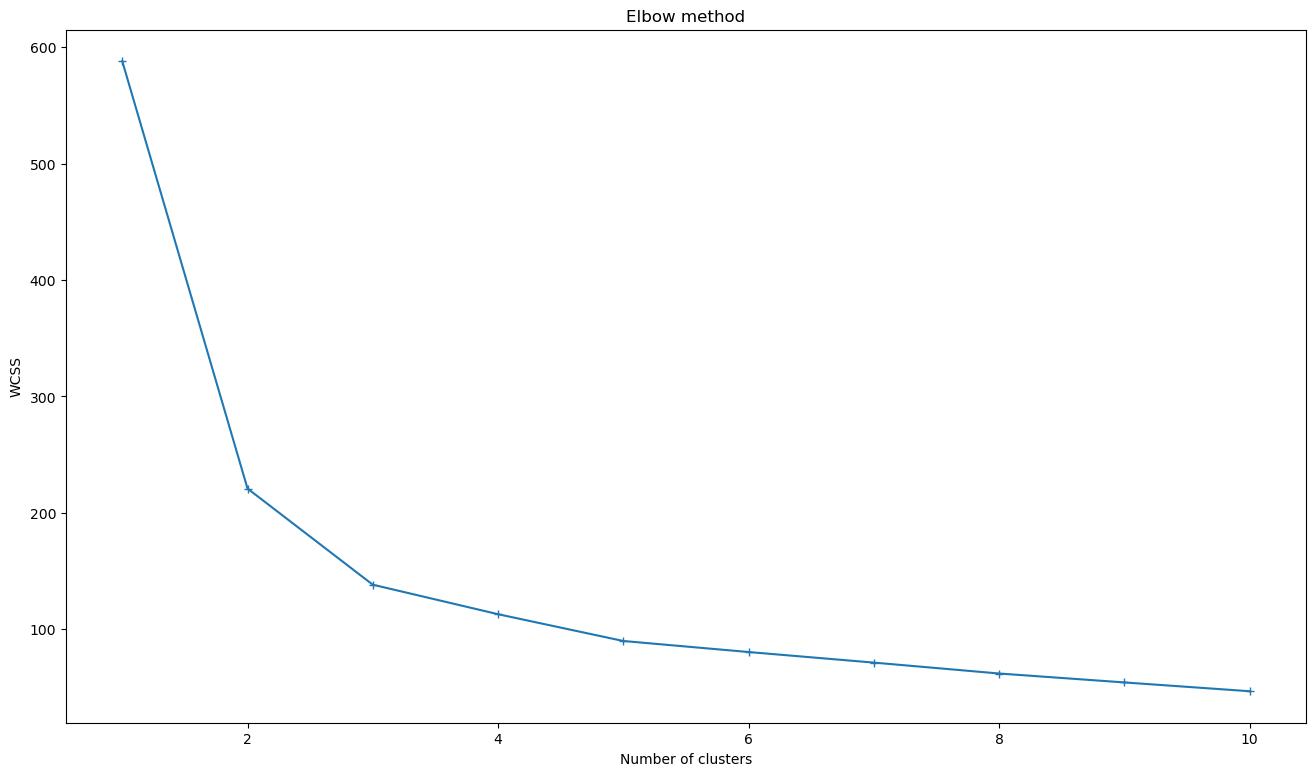

In [53]:
plt.figure(figsize=(16,9))
plt.plot(range(1,11),wcss,marker='+')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [55]:
kmeans=KMeans(n_clusters=3,random_state=42,n_init=10)
kmeans_clusters=kmeans.fit_predict(data_scaled)
df['Cluster_KMeans'] = kmeans_clusters
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster_KMeans
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [56]:
df.query("Cluster_KMeans == 0")

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster_KMeans
50,7.0,3.2,4.7,1.4,Iris-versicolor,0
51,6.4,3.2,4.5,1.5,Iris-versicolor,0
52,6.9,3.1,4.9,1.5,Iris-versicolor,0
56,6.3,3.3,4.7,1.6,Iris-versicolor,0
65,6.7,3.1,4.4,1.4,Iris-versicolor,0
70,5.9,3.2,4.8,1.8,Iris-versicolor,0
75,6.6,3.0,4.4,1.4,Iris-versicolor,0
76,6.8,2.8,4.8,1.4,Iris-versicolor,0
77,6.7,3.0,5.0,1.7,Iris-versicolor,0
85,6.0,3.4,4.5,1.6,Iris-versicolor,0


In [57]:
df.query("Cluster_KMeans == 1")

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster_KMeans
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
5,5.4,3.9,1.7,0.4,Iris-setosa,1
6,4.6,3.4,1.4,0.3,Iris-setosa,1
7,5.0,3.4,1.5,0.2,Iris-setosa,1
8,4.4,2.9,1.4,0.2,Iris-setosa,1
9,4.9,3.1,1.5,0.1,Iris-setosa,1


In [58]:
df.query("Cluster_KMeans == 2")

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster_KMeans
53,5.5,2.3,4.0,1.3,Iris-versicolor,2
54,6.5,2.8,4.6,1.5,Iris-versicolor,2
55,5.7,2.8,4.5,1.3,Iris-versicolor,2
57,4.9,2.4,3.3,1.0,Iris-versicolor,2
58,6.6,2.9,4.6,1.3,Iris-versicolor,2
59,5.2,2.7,3.9,1.4,Iris-versicolor,2
60,5.0,2.0,3.5,1.0,Iris-versicolor,2
61,5.9,3.0,4.2,1.5,Iris-versicolor,2
62,6.0,2.2,4.0,1.0,Iris-versicolor,2
63,6.1,2.9,4.7,1.4,Iris-versicolor,2


In [60]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data_scaled)

In [61]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2])

In [62]:
kmeans.cluster_centers_

array([[ 1.11874194,  0.09175788,  0.98702247,  1.0108632 ],
       [-1.02392779,  0.86211404, -1.32208614, -1.26950045],
       [-0.06600649, -0.87873258,  0.32827074,  0.25818176]])

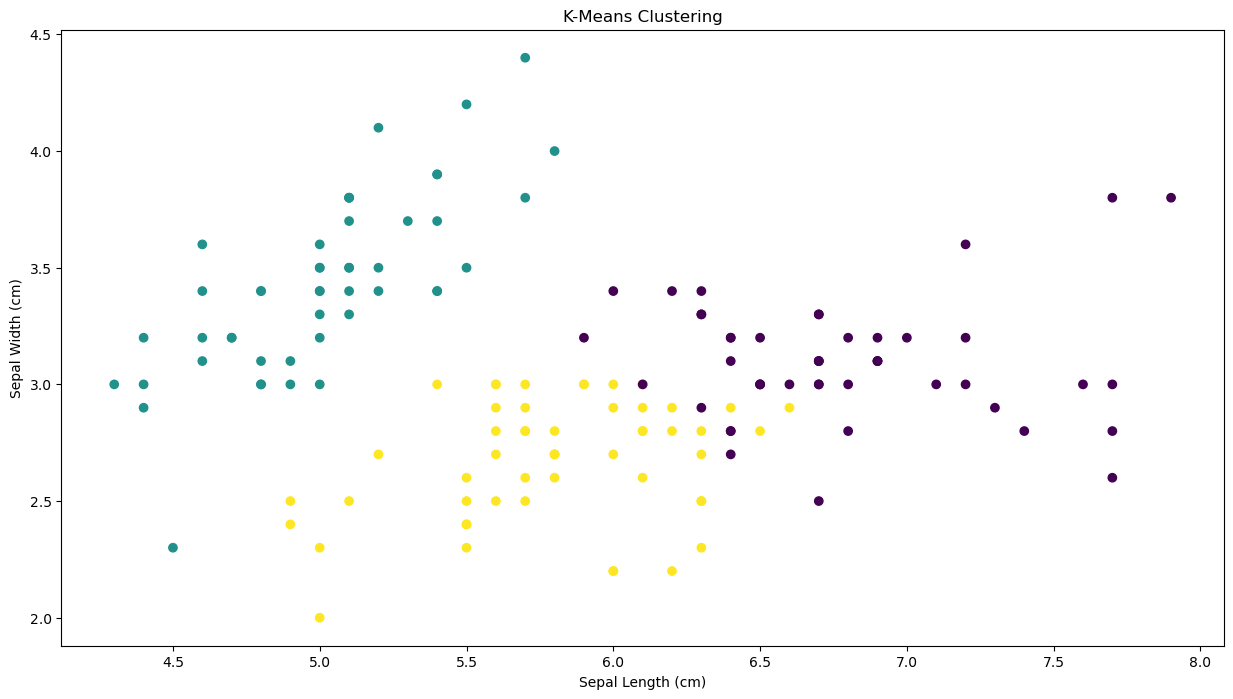

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.scatter(df['sepal_length'], df['sepal_width'], c=y_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()




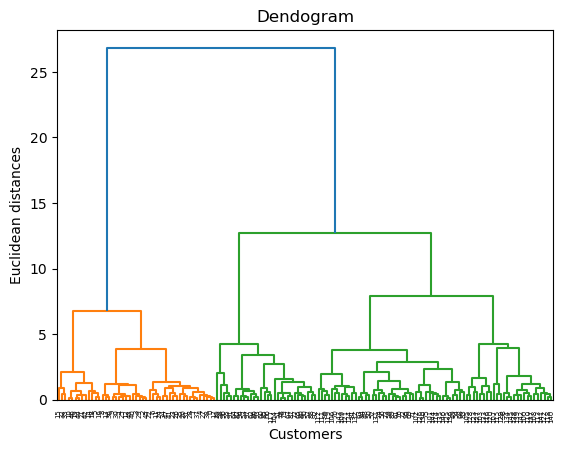

In [65]:
dendogram=sch.dendrogram(sch.linkage(data_scaled,method='ward')) 
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [67]:
agg_clustering=AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean')
agg_clusters = agg_clustering.fit_predict(data_scaled)
df['Cluster_Hierarchical']=agg_clusters

In [68]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster_KMeans,Cluster_Hierarchical
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0,0


In [70]:
cols_needed=df.select_dtypes(exclude='object').columns[:4]
df.groupby('Cluster_Hierarchical')[cols_needed].mean().T

Cluster_Hierarchical,0,1,2
sepal_length,6.557143,5.021277,5.530000
sepal_width,2.997143,3.455319,2.566667
petal_length,5.270000,1.465957,3.930000
petal_width,1.854286,0.248936,1.206667
